In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean

import seaborn as sns
import matplotlib.pylab as plt

import scipy.io
from scipy import signal

from IPython.display import Markdown, display
import sys
import os

In [2]:
# Paths del dataset
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

BASE_DIR = os.getcwd()

In [4]:
from utils.funciones_curso import multiple_plot
from utils.funciones_tarea import obtener_archivos_mat, crear_lista_markdown, \
                                  crear_tabla_markdown, graficar_medida, graficar_medida2, \
                                  filter_data

In [5]:
raw_data_base_mat = scipy.io.loadmat("raw_data_base.mat")
keys_raw_data_base_mat = list(raw_data_base_mat.keys())
print(keys_raw_data_base_mat)
users_df = pd.DataFrame(raw_data_base_mat['s']).T
users_df.rename(columns={0: 's'}, inplace= True)
repetitions_df = pd.DataFrame(raw_data_base_mat['repetition']).T
repetitions_df.rename(columns={0: 'rep'}, inplace= True)
labels_df = pd.DataFrame(raw_data_base_mat['label']).T
labels_df.rename(columns={0: 'label'}, inplace= True)
# users_df = pd.DataFrame(raw_data_base_mat[keys_raw_data_base_mat[3]])
#repetitions_df = pd.DataFrame(raw_data_base_mat[keys_raw_data_base_mat[14]])
#labels_df = pd.DataFrame(raw_data_base_mat[keys_raw_data_base_mat[15]])
emgs_df = pd.DataFrame()
#emgs_df = pd.DataFrame(raw_data_base_mat[keys_raw_data_base_mat[4]])
for k in keys_raw_data_base_mat[4:14]:
    emgs_df[k] = pd.DataFrame(raw_data_base_mat[k]).T
# df_db =  pd.concat([users_df, emgs_df, repetitions_df , labels_df], axis=1)

['__header__', '__version__', '__globals__', 's', 'emg_1', 'emg_2', 'emg_3', 'emg_4', 'emg_5', 'emg_6', 'emg_7', 'emg_8', 'emg_9', 'emg_10', 'repetition', 'label']


In [6]:
emgs_df.head()

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10
0,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0146,0.0488,0.0024,0.0317
1,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0122,0.0439,0.0024,0.0317
2,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.0073,0.0366,0.0024,0.0293
3,0.0049,0.0024,0.0024,0.0024,0.0024,0.0073,0.0049,0.0317,0.0024,0.0269
4,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0024,0.0220


In [7]:
# perform 2-order 1Hz low-pass filter
emgs_df_filt =  filter_data(emgs_df)  

In [8]:
data_base_filter =  pd.concat([users_df, emgs_df_filt, repetitions_df , labels_df], axis=1)

In [9]:
data_base_filter.head()

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.001180,0.002400,0.002404,0.002422,0.001676,0.008484,0.014279,0.050278,0.0024,0.026812,0,0
1,1,0.001306,0.002400,0.002406,0.002423,0.001729,0.008276,0.014346,0.049847,0.0024,0.026655,0,0
2,1,0.001429,0.002400,0.002407,0.002425,0.001782,0.008066,0.014409,0.049424,0.0024,0.026491,0,0
3,1,0.001550,0.002400,0.002408,0.002426,0.001833,0.007856,0.014467,0.049012,0.0024,0.026320,0,0
4,1,0.001669,0.002399,0.002410,0.002427,0.001882,0.007646,0.014520,0.048612,0.0024,0.026144,0,0


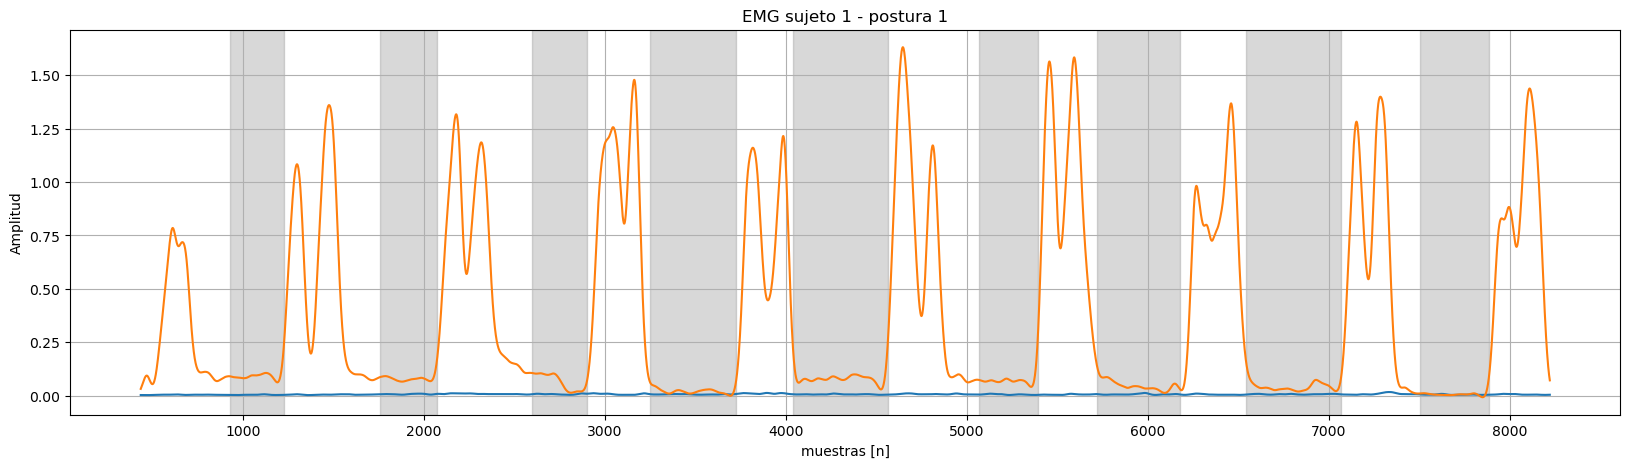

In [11]:
df_s1 = data_base_filter[data_base_filter['s'] == 1]
graficar_medida2(df_s1, 
                 columnas = ['emg_1','emg_2','emg_3'], 
                 labels = df_s1['label'],
                 num = 1, 
                 fs = None,
                 titulo="EMG sujeto 1 - postura 1"
                 )

#graficar_medida(emg_s1, fs = 100, titulo = "Canales EMS sujeto 1 - Ejercicio 1")